# CIA Country Analysis and Clustering


Source: All these data sets are made up of data from the US government. 
https://www.cia.gov/library/publications/the-world-factbook/docs/faqs.html

Dataset: The dataset chosen for this assignment was https://www.openintro.org/data/index.php?data=cia_factbook.

## Goal: 

### Gain insights into similarity between countries and regions of the world by experimenting with K-Means Clustering
----

In [91]:
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Perform Exploratory Data Analysis

-----

In [92]:
df = pd.read_csv('Datasets/cia_factbook.csv')

variable_names = pd.Series(df.columns, name='variables')
df['variables'] = variable_names


variable_names

0                     country
1                        area
2                  birth_rate
3                  death_rate
4       infant_mortality_rate
5              internet_users
6           life_exp_at_birth
7     maternal_mortality_rate
8          net_migration_rate
9                  population
10     population_growth_rate
Name: variables, dtype: object

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259 entries, 0 to 258
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   country                  259 non-null    object 
 1   area                     257 non-null    float64
 2   birth_rate               224 non-null    float64
 3   death_rate               225 non-null    float64
 4   infant_mortality_rate    224 non-null    float64
 5   internet_users           213 non-null    float64
 6   life_exp_at_birth        224 non-null    float64
 7   maternal_mortality_rate  184 non-null    float64
 8   net_migration_rate       222 non-null    float64
 9   population               238 non-null    float64
 10  population_growth_rate   233 non-null    float64
 11  variables                11 non-null     object 
dtypes: float64(10), object(2)
memory usage: 24.4+ KB


In [94]:
df.head()

,country,area,birth_rate,death_rate,infant_mortality_rate,internet_users,life_exp_at_birth,maternal_mortality_rate,net_migration_rate,population,population_growth_rate,variables
0,Russia,17098242.0,11.87,13.83,7.08,40853000.0,70.16,34.0,1.69,1.424703e+08,-0.03,country
1,Canada,9984670.0,10.29,8.31,4.71,26960000.0,81.67,12.0,5.66,3.483484e+07,0.76,area
2,United States,9826675.0,13.42,8.15,6.17,245000000.0,79.56,21.0,2.45,3.188921e+08,0.77,birth_rate
3,China,9596960.0,12.17,7.44,14.79,389000000.0,75.15,37.0,-0.32,1.355693e+09,0.44,death_rate
4,Brazil,8514877.0,14.72,6.54,19.21,75982000.0,73.28,56.0,-0.15,2.026568e+08,0.80,infant_mortality_rate


In [95]:
df.tail()

,country,area,birth_rate,death_rate,infant_mortality_rate,internet_users,life_exp_at_birth,maternal_mortality_rate,net_migration_rate,population,population_growth_rate,variables
254,Bouvet Island,49.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
255,Palmyra Atoll,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
256,Akrotiri,123.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
257,European Union,NaN,NaN,NaN,4.33,NaN,80.02,NaN,NaN,511434812.0,NaN,NaN
258,Saint Barthelemy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7267.0,NaN,NaN


In [96]:
df.isna().sum()

country                      0
area                         2
birth_rate                  35
death_rate                  34
infant_mortality_rate       35
internet_users              46
life_exp_at_birth           35
maternal_mortality_rate     75
net_migration_rate          37
population                  21
population_growth_rate      26
variables                  248
dtype: int64

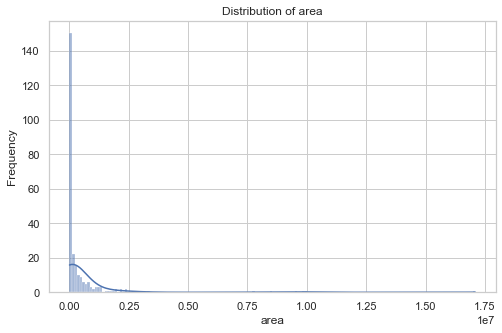

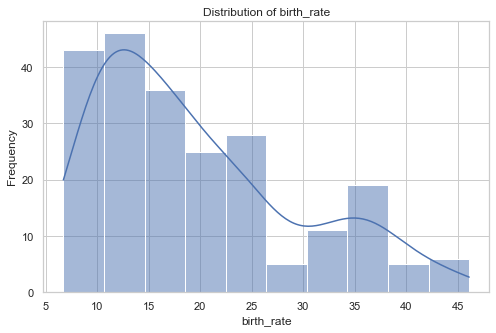

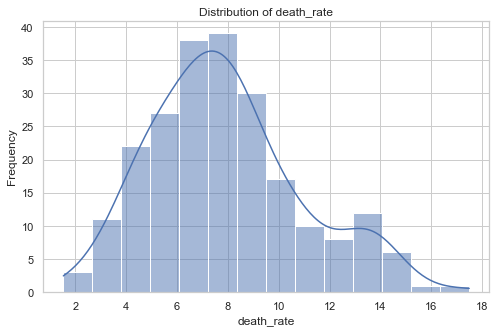

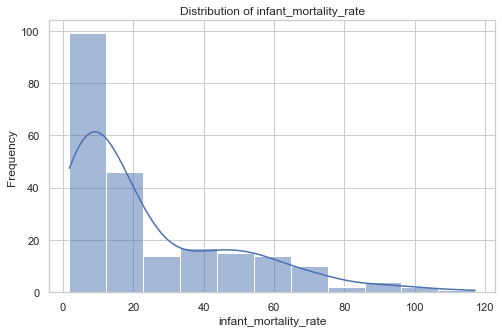

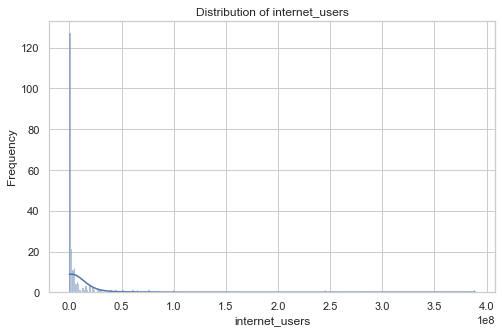

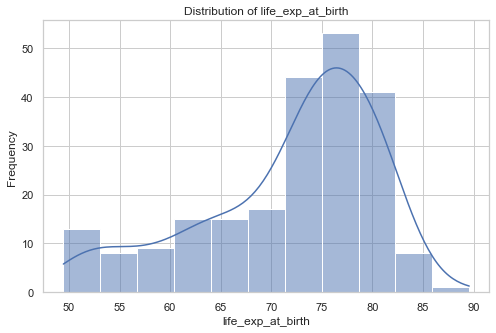

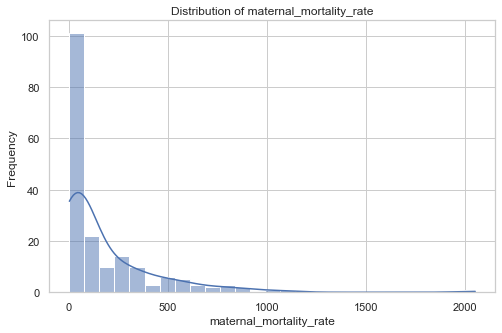

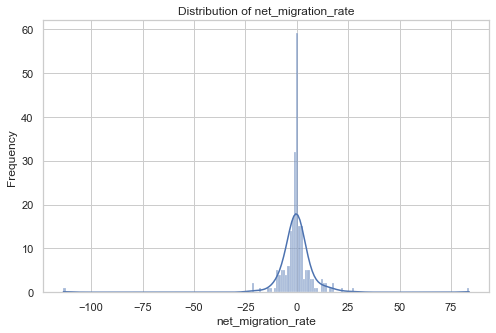

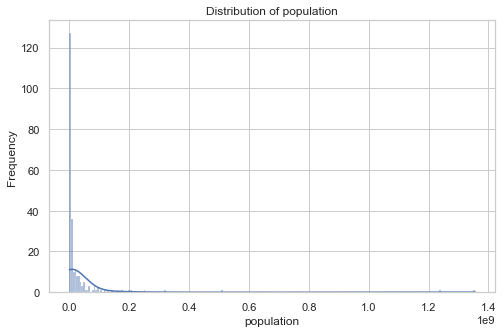

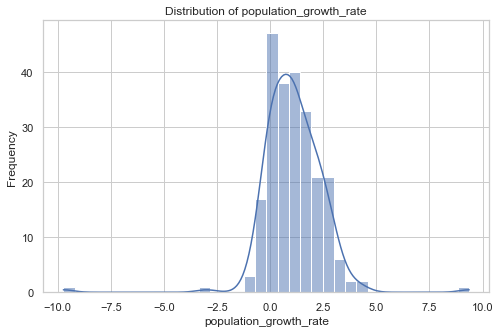

<Figure size 864x432 with 0 Axes>

In [97]:
numeric_df = df.select_dtypes(include=['float64'])
num_cols = numeric_df.columns

for col in num_cols:
    plt.figure(figsize=(8, 5))
    
    sns.histplot(data=numeric_df[col].dropna(), kde=True)

    plt.title(f'Distribution of {col}')

    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

plt.figure(figsize=(12, 6))
plt.show()

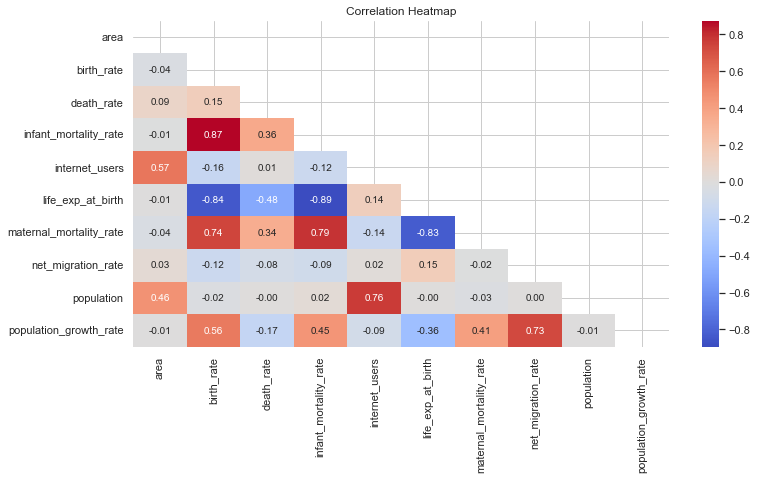

In [98]:
mask = np.triu(np.ones_like(numeric_df.corr(), dtype=bool))
plt.figure(figsize=(12, 6))

sns.heatmap(numeric_df.corr(), mask=mask, annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Correlation Heatmap')

plt.show()

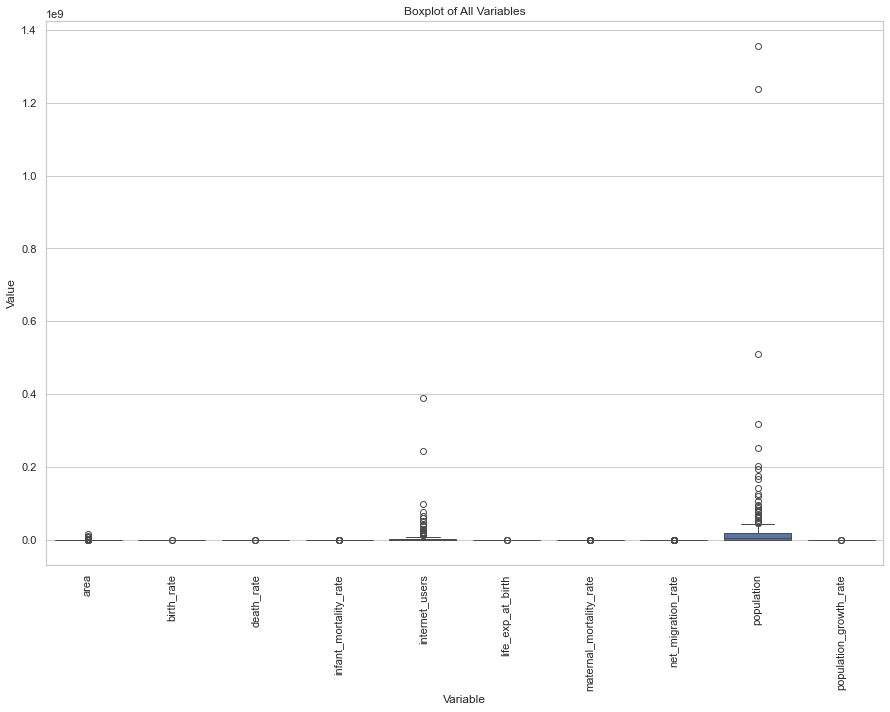

In [99]:
numeric_df = df.select_dtypes(include=[np.number])
df_melted = numeric_df.melt(var_name='Variable', value_name='Value')

plt.figure(figsize=(15, 10))

sns.boxplot(x='Variable', y='Value', data=df_melted)

plt.title('Boxplot of All Variables')

plt.xlabel('Variable')
plt.ylabel('Value')

plt.xticks(rotation=90) 

plt.show()

## 2. Feature Engineering for Missing Data

**TASK: What countries have NaN for Agriculture? What is the main aspect of these countries?**

*Note: I'm using a different dataset, so I'll differentiate countries that have NaN for internet_users instead*

In [100]:
df.isna().sum()

country                      0
area                         2
birth_rate                  35
death_rate                  34
infant_mortality_rate       35
internet_users              46
life_exp_at_birth           35
maternal_mortality_rate     75
net_migration_rate          37
population                  21
population_growth_rate      26
variables                  248
dtype: int64

In [101]:
nan_countries = df[df['internet_users'].isna()]

print("Countries with NaN values for internet_users:")
print(nan_countries[['country', 'internet_users']])

Countries with NaN values for internet_users:
                                           country  internet_users
9                                          Algeria             NaN
22                                          Angola             NaN
31                                         Nigeria             NaN
41                                     South Sudan             NaN
77                                  Western Sahara             NaN
98                                    Korea, North             NaN
101                                          Benin             NaN
124                                       Svalbard             NaN
167                                         Kosovo             NaN
183                       Turks and Caicos Islands             NaN
191                                    Isle of Man             NaN
194                       Northern Mariana Islands             NaN
195                                          Palau             NaN
197             

In [102]:
print("\nMain aspects of these countries:")
nan_countries.describe()


Main aspects of these countries:


,area,birth_rate,death_rate,infant_mortality_rate,internet_users,life_exp_at_birth,maternal_mortality_rate,net_migration_rate,population,population_growth_rate
count,4.400000e+01,15.000000,16.000000,16.000000,0.0,16.000000,6.000000,15.000000,2.500000e+01,20.000000
mean,1.325385e+05,23.150000,7.539375,28.202500,NaN,71.587500,610.333333,-0.633333,3.183962e+07,1.152000
std,4.266540e+05,11.001679,2.933786,28.144576,NaN,9.308466,737.800154,9.013149,1.061318e+08,1.391571
min,0.000000e+00,7.700000,3.080000,4.170000,NaN,52.620000,81.000000,-21.640000,4.800000e+01,-1.020000
25%,6.750000e+00,13.755000,4.637500,7.895000,NaN,65.367500,160.250000,-2.475000,7.267000e+03,0.000000
50%,8.900000e+01,22.870000,8.195000,11.215000,NaN,75.650000,400.000000,0.000000,5.148300e+04,0.680000
75%,1.686750e+03,33.610000,9.202500,56.340000,NaN,78.372500,585.000000,3.950000,1.016056e+07,2.497500
max,2.381741e+06,38.970000,13.160000,79.990000,NaN,80.980000,2054.000000,12.230000,5.114348e+08,4.120000


**TASK: Notice climate is missing for a few countries, but not the Region! Let's use this to our advantage. Fill in the missing Climate values based on the mean climate value for its region.**

Hints on how to do this: https://stackoverflow.com/questions/19966018/pandas-filling-missing-values-by-mean-in-each-group


*Note: Again, different dataset. I'll still use the same method.*

In [103]:
df['internet_users'] = df.groupby('country')['internet_users'].transform(lambda x: x.fillna(x.mean()))
overall_mean_birth_rate = df['internet_users'].mean()

df['internet_users'].fillna(overall_mean_birth_rate, inplace=True)

df.isna().sum()

country                      0
area                         2
birth_rate                  35
death_rate                  34
infant_mortality_rate       35
internet_users               0
life_exp_at_birth           35
maternal_mortality_rate     75
net_migration_rate          37
population                  21
population_growth_rate      26
variables                  248
dtype: int64

**TASK:Use the same method for the missing values in Literacy.**

*Note: Again, different dataset. Still gonna use the same process though for net_migration_rate*

In [104]:
df['net_migration_rate'] = df.groupby('country')['net_migration_rate'].transform(lambda x: x.fillna(x.mean()))
overall_mean_birth_rate = df['net_migration_rate'].mean()

df['net_migration_rate'].fillna(overall_mean_birth_rate, inplace=True)

df.isna().sum()

country                      0
area                         2
birth_rate                  35
death_rate                  34
infant_mortality_rate       35
internet_users               0
life_exp_at_birth           35
maternal_mortality_rate     75
net_migration_rate           0
population                  21
population_growth_rate      26
variables                  248
dtype: int64

In [105]:
df.head()

,country,area,birth_rate,death_rate,infant_mortality_rate,internet_users,life_exp_at_birth,maternal_mortality_rate,net_migration_rate,population,population_growth_rate,variables
0,Russia,17098242.0,11.87,13.83,7.08,40853000.0,70.16,34.0,1.69,1.424703e+08,-0.03,country
1,Canada,9984670.0,10.29,8.31,4.71,26960000.0,81.67,12.0,5.66,3.483484e+07,0.76,area
2,United States,9826675.0,13.42,8.15,6.17,245000000.0,79.56,21.0,2.45,3.188921e+08,0.77,birth_rate
3,China,9596960.0,12.17,7.44,14.79,389000000.0,75.15,37.0,-0.32,1.355693e+09,0.44,death_rate
4,Brazil,8514877.0,14.72,6.54,19.21,75982000.0,73.28,56.0,-0.15,2.026568e+08,0.80,infant_mortality_rate


# 3. Data Feature Preparation

**TASK: Create a dummy variable to all categorical data.**

In [106]:
dummy_variables = pd.get_dummies(df['country'], drop_first=True)
df = pd.concat([df, dummy_variables], axis=1)

df.drop('country', axis=1, inplace=True)

**TASK: For numerical data perform standard scaler.**

In [107]:
num_cols = df.select_dtypes(include=['float64']).columns
scaler = StandardScaler()

df[num_cols] = scaler.fit_transform(df[num_cols])

In [108]:
df.head()

,area,birth_rate,death_rate,infant_mortality_rate,internet_users,life_exp_at_birth,maternal_mortality_rate,net_migration_rate,population,population_growth_rate,...,Venezuela,Vietnam,Virgin Islands,Wake Island,Wallis and Futuna,West Bank,Western Sahara,Yemen,Zambia,Zimbabwe
0,9.782533,-0.807327,1.992068,-0.724460,1.073438,-0.189875,-0.549947,0.181833,0.864581,-0.798862,...,False,False,False,False,False,False,False,False,False,False
1,5.582179,-0.971092,0.135547,-0.823111,0.615150,1.121238,-0.633983,0.567537,0.019936,-0.240790,...,False,False,False,False,False,False,False,False,False,False
2,5.488888,-0.646671,0.081735,-0.762338,7.807642,0.880886,-0.599604,0.255670,2.249012,-0.233725,...,False,False,False,False,False,False,False,False,False,False
3,5.353248,-0.776232,-0.157057,-0.403531,12.557774,0.378540,-0.538488,-0.013448,10.385072,-0.466844,...,False,False,False,False,False,False,False,False,False,False
4,4.714310,-0.511928,-0.459751,-0.219548,2.232240,0.165527,-0.465911,0.003068,1.336881,-0.212533,...,False,False,False,False,False,False,False,False,False,False


# 4. Creating and Fitting Kmeans Model

**TASK:** 

- Plot the within sum of squares vs. the number of cluster and find the optimal number of clusters.
- Fit a k-means model of the optimum cluster.

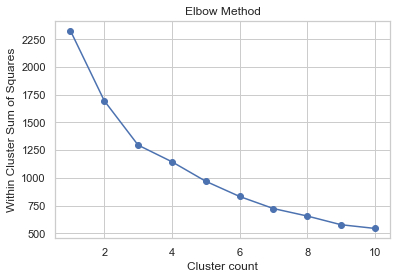

In [109]:
X = df.select_dtypes(include=['float64'])

imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
X_imputed_df = pd.DataFrame(X_imputed, columns=X.columns)

within_sum_squares = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, random_state=69)
    kmeans.fit(X_imputed_df)
    within_sum_squares.append(kmeans.inertia_)

plt.plot(range(1, 11), within_sum_squares, marker='o')

plt.title('Elbow Method')

plt.xlabel('Cluster count')
plt.ylabel('Within Cluster Sum of Squares')

plt.show()

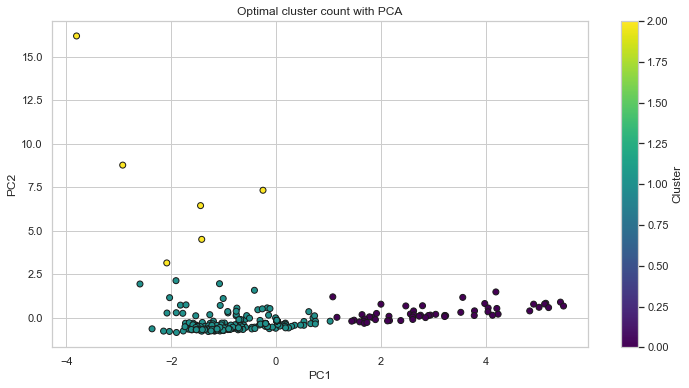

In [110]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_imputed_df)

kmeans = KMeans(n_clusters=3, init='k-means++',n_init=10, random_state=42)
kmeans.fit(X_imputed_df)

cluster_labels = kmeans.labels_

plt.figure(figsize=(12, 6))

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', edgecolor='k')

plt.title('Optimal cluster count with PCA')

plt.xlabel('PC1')
plt.ylabel('PC2')

plt.colorbar(label='Cluster')

plt.show()

-----

# 5. Model Interpretation


**TASK: What K value do you think is a good choice? Are there multiple reasonable choices? What features are helping define these cluster choices.**

Based on the Elbow Method, I tested cluster values ranging from 2 to 4 and observed the within-cluster sum of squares. The point where the WCSS begins to plateau suggests a balance between goodness of fit and model complexity. 

For this dataset, 2 is probably a good choice because it has a balance between interpretability and actual efficiency, but there are probably more good choices for the K value, like 3 or 4. They could also be considered based on specific use-case requirements and trade-offs between simplicity and complexity.

To identify which features are significant in defining the clusters, I conducted centroid analysis using the cluster_centers_ attribute of the KMeans model. By comparing the mean values of each feature across the clusters, I determined that features with substantial differences in their means are influential in cluster formation. A scatter plot was used to visualize the outcome, though other graphs and plots may be helpful as well.

---